<div class="alert alert-block alert-info">
<h1><b>Aim:</b> Support Vector Machine Algorithm </h1></div>

A support vector machine (SVM) is a type of supervised learning
algorithm used in machine learning to solve classification and
regression tasks; SVMs are particularly good at solving binary
classification problems, which require classifying the elements of a
data set into two groups.
The aim of a support vector machine algorithm is to find the best
possible line, or decision boundary, that separates the data points of
different data classes. This boundary is called a hyperplane when
working in high-dimensional feature spaces. The idea is to maximize
the margin, which is the distance between the hyperplane and the
closest data points of each category, thus making it easy to
distinguish data classes.
SVMs are useful for analyzing complex data that can't be separated
by a simple straight line. Called nonlinear SMVs, they do this by
using a mathematical trick that transforms data into higher-
dimensional space, where it is easier to find a boundary.

## How do support vector machines work?
The key idea behind SVMs is to transform the input data into a
higher-dimensional feature space. This transformation makes it
easier to find a linear separation or to more effectively classify the
data set.
To do this, SVMs use a kernel function. Instead of explicitly
calculating the coordinates of the transformed space, the kernel
function enables the SVM to implicitly compute the dot products
between the transformed feature vectors and avoid handling
expensive, unnecessary computations for extreme cases.

SVMs can handle both linearly separable and non-linearly separable
data. They do this by using different types of kernel functions, such
as the linear kernel, polynomial kernel or radial basis function (RBF)
kernel. These kernels enable SVMs to effectively capture complex
relationships and patterns in the data.
During the training phase, SVMs use a mathematical formulation to
find the optimal hyperplane in a higher-dimensional space, often
called the kernel space. This hyperplane is crucial because it
maximizes the margin between data points of different classes,
while minimizing the classification errors.
The kernel function plays a critical role in SVMs, as it makes it
possible to map the data from the original feature space to the
kernel space. The choice of kernel function can have a significant
impact on the performance of the SVM algorithm; choosing the best
kernel function for a particular problem depends on the
characteristics of the data.

## **Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:**

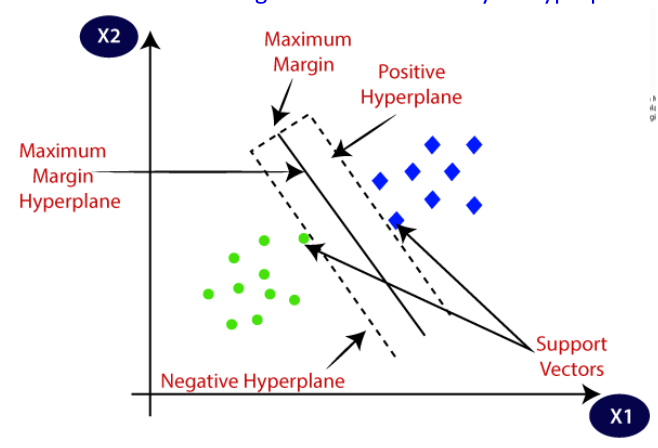

## Some of the most popular kernel functions for SVMs are the following:
    1. Linear kernel.
    2. Polynomial kernel.
    3. RBF kernel.
    4. Sigmoid kernel.

## Types of support vector machines:
    1. Linear SVM
    2. Nonlinear SVM
    

# Implementation 

In [79]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

In [54]:
def train_svm(X, y, C=1, epochs=1000, learning_rate=0.01):
    # Initialize weights and bias
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    # Training
    for epoch in range(epochs):
        for i in range(m):
            # Check if the current point violates the margin
            if y[i] * (np.dot(w, X[i]) + b) < 1:
                # Update weights and bias using gradient descent
                w = w - learning_rate * (2 * C * w - np.dot(y[i], X[i]))
                b = b + learning_rate * y[i]

    return w, b

In [55]:
def predict_svm(X, w, b):
    return np.sign(np.dot(X, w) + b)

In [56]:
df = pd.read_csv(r"diabetes.csv")

In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
df['Outcome'] = df['Outcome'].replace({0: -1, 1: 1})

In [59]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,-1
764,2,122,70,27,0,36.8,0.340,27,-1
765,5,121,72,23,112,26.2,0.245,30,-1
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
# Training the SVM
X_train, X_test = df.iloc[:614, :-1].values, df.iloc[614:, :-1].values
y_train, y_test = df.iloc[:614, -1].values, df.iloc[614:, -1].values

In [61]:
C_value = 1
epochs_value = 1000
learning_rate_value = 0.01

In [62]:
weights, bias = train_svm(X_train, y_train, C=C_value, epochs=epochs_value, learning_rate=learning_rate_value)

In [63]:
# Making predictions
predictions = predict_svm(X_test, weights, bias)

In [64]:
print("Predictions:", predictions)

Predictions: [ 1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.
  1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.
  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.]


In [89]:
# Calculating accuracy 
accuracy = accuracy_score(y_test, predictions)
# Generating a classification report
report = classification_report(y_test, predictions, target_names=['Class 1', 'Class -1'])

In [90]:
# Formatting the output in a table-like format
formatted_report = report.replace('\n\n', '\n').replace(' / ', '/').replace('precision', 'Precision').replace('recall', 'Recall').replace('f1-score', 'F1-Score').replace('support', 'Support')
formatted_report += f"\n\nAccuracy: {accuracy:.4f}"

In [91]:
print(formatted_report)

              Precision    Recall  F1-Score   Support
     Class 1       0.73      0.46      0.57        99
    Class -1       0.42      0.69      0.52        55
    accuracy                           0.55       154
   macro avg       0.57      0.58      0.54       154
weighted avg       0.62      0.55      0.55       154


Accuracy: 0.5455


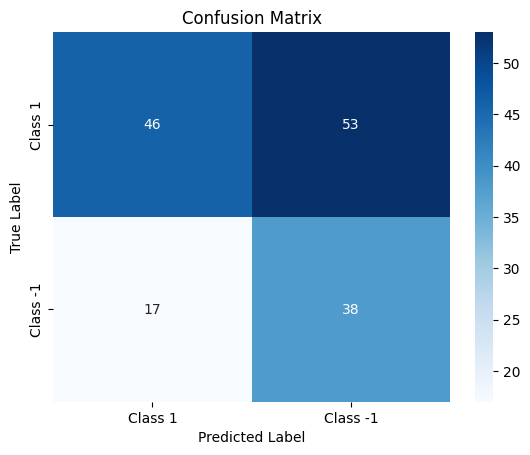

In [82]:
cm = confusion_matrix(y_test, predictions)
# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 1', 'Class -1'], yticklabels=['Class 1', 'Class -1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()